# **Tarea Nº 2**

In [19]:
# Calificación: 19.5

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours

    b. Flew to Houston (IAH or HOU)

    c. Were operated by United, American, or Southwest

    d. Departed in spring (March, April, and June)

    e. Arrived more than two hours late, but didn’t leave late
    
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

In [1]:
# Solution 

import pandas as pd
import numpy as np
import os 

ruta = os.path.join('C:/Users/Jakelin/Documents/GitHub/tarea-2-mendoza-remon-1')
data = pd.read_csv('flights.csv')
data.head
#dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, carrier, flight, tailnum origin

<bound method NDFrame.head of         Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                1  2013      1    1     517.0             515        2.0   
1                2  2013      1    1     533.0             529        4.0   
2                3  2013      1    1     542.0             540        2.0   
3                4  2013      1    1     544.0             545       -1.0   
4                5  2013      1    1     554.0             600       -6.0   
...            ...   ...    ...  ...       ...             ...        ...   
336771      336772  2013      9   30       NaN            1455        NaN   
336772      336773  2013      9   30       NaN            2200        NaN   
336773      336774  2013      9   30       NaN            1210        NaN   
336774      336775  2013      9   30       NaN            1159        NaN   
336775      336776  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay c

In [78]:
delay_3more = data.loc[data.arr_delay>=180,:]
print(delay_3more.flight)


151       3944
649       4417
673       4633
746       4644
801       3347
          ... 
335540     431
335720      86
335778    1271
336252    5157
336757    3320
Name: flight, Length: 3897, dtype: int64


In [79]:
# b
flew = data.loc[(data.dest == 'IAH') | (data.dest == 'HOU'), :]
# alternative way 
#data.loc[data.dest.isin(['IAH', 'HOU']),:]
print(flew.flight)

0         1545
1         1714
32         496
81         473
89        1479
          ... 
336524     652
336527    2067
336618    1128
336694    1545
336737     475
Name: flight, Length: 9168, dtype: int64


In [80]:
# c
#data1 = data.drop_duplicates(subset=['carrier'])
#data1.carrier
carrier = data.loc[(data.carrier == 'UA') | (data.carrier == 'AA') | (data.carrier == 'WN')]
print(carrier.flight)

0         1545
1         1714
2         1141
5         1696
9          301
          ... 
336736     382
336737     475
336751     185
336755     523
336762     471
Name: flight, Length: 101773, dtype: int64


In [82]:
# d
months = data.loc[(data.month==3) | (data.month==4) | (data.month==5)]
print(months.flight)

136247      11
136248     707
136249     608
136250    1117
136251     475
          ... 
222186     425
222187      30
222188     707
222189     739
222190     701
Name: flight, Length: 83594, dtype: int64


In [85]:
# e
delay = data.loc[(data.arr_delay > 120) & (data.dep_delay == 0) ]
print(delay.flight)


33011     5181
214512    4626
250689    1057
Name: flight, dtype: int64


In [87]:
# f 
delay_re = data.loc[(data.dep_delay>=60) & (data.air_time - data.dep_delay > 30)]
print(delay_re.flight)

135        443
268       1086
349       4646
373        673
395       4869
          ... 
336674    1576
336704      21
336742    4321
336760    4672
336762     471
Name: flight, Length: 10733, dtype: int64


In [32]:
# 7
#data.time_hour.head() 
# Convert 'time_hour' to datetime format if it's not already
data['time_hour'] = pd.to_datetime(data['time_hour'])

# Filter flights departing between midnight and 5 am (inclusive)
early_morning_flights = data[(data['time_hour'].dt.hour >= 0) & (data['time_hour'].dt.hour <= 5)]

# Display the early morning flights
print("Flights that departed between midnight and 5 am:")
print(early_morning_flights.flight.head())

Flights that departed between midnight and 5 am:
0    1545
1    1714
2    1141
3     725
5    1696
Name: flight, dtype: int64


In [14]:
# ONly 1 error, the no penalty
# Be careful with diffrente time zones

2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [8]:

# Solution
flight = data.isna().sum()
print(flight)


Unnamed: 0           0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [3]:
# Solution
missing_values = data.loc[data.arr_time == 2000]
print(missing_values.isna().sum())

Unnamed: 0        0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         3
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          3
distance          0
hour              0
minute            0
time_hour         0
dtype: int64


In [ ]:
# Grading: -0.5

4. What does `False & None` evaluate to? Why?


In [35]:
# Solution
# For boolean values, True is equivalent to 1 and False is equivalent to 0. 
# In the case of None, it represents to 0. 
# So, since False represents 0 and None is considered as False in a boolean context, the expression False & None evaluates to False.
print(False and None)

False


## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [15]:
# Solution
datac = data.loc[:,["dep_time", "dep_delay", "arr_time", "arr_delay"]]
print(datac)

datad = data[["dep_time", "dep_delay", "arr_time", "arr_delay"]]
print(datad)

datae = data.iloc[:, [data.columns.get_loc('dep_time'), data.columns.get_loc('dep_delay'), data.columns.get_loc('arr_time'), data.columns.get_loc('arr_delay')]]
print(datae)
#datac.shape
#datac2 = data[:, data.columns.get_loc('dep_time')  data.columns.get_loc('dep_delay') & data.columns.get_loc('arr_time')]
#data.iloc

        dep_time  dep_delay  arr_time  arr_delay
0          517.0        2.0     830.0       11.0
1          533.0        4.0     850.0       20.0
2          542.0        2.0     923.0       33.0
3          544.0       -1.0    1004.0      -18.0
4          554.0       -6.0     812.0      -25.0
...          ...        ...       ...        ...
336771       NaN        NaN       NaN        NaN
336772       NaN        NaN       NaN        NaN
336773       NaN        NaN       NaN        NaN
336774       NaN        NaN       NaN        NaN
336775       NaN        NaN       NaN        NaN

[336776 rows x 4 columns]
        dep_time  dep_delay  arr_time  arr_delay
0          517.0        2.0     830.0       11.0
1          533.0        4.0     850.0       20.0
2          542.0        2.0     923.0       33.0
3          544.0       -1.0    1004.0      -18.0
4          554.0       -6.0     812.0      -25.0
...          ...        ...       ...        ...
336771       NaN        NaN       NaN     

## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [16]:
# Solution
#data = pd.DataFrame(data)
flights_sorted = data.sort_values(by='arr_delay', ascending=False)

#Muestra el vuelo más retrasado
print(flights_sorted.head(1))


      Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
7072        7073  2013      1    9     641.0             900     1301.0   

      arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
7072    1242.0            1530     1272.0      HA      51  N384HA    JFK  HNL   

      air_time  distance  hour  minute            time_hour  
7072     640.0      4983     9       0  2013-01-09 09:00:00  


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [17]:
# Solution
# Filtrar para considerar solo salidas antes de lo programado (dep_delay negativo)
early_departures = data[data['dep_delay'] < 0]

# Ordenar por los minutos de anticipación en la salida (valores más negativos de dep_delay)
top_early_departures = early_departures.sort_values(by='dep_delay')

# Seleccionar las columnas relevantes y mostrar los 5 vuelos que partieron más temprano
top_early_departures = top_early_departures[['tailnum', 'year', 'month', 'day', 'dep_delay']].head(5)

# Mostrar el resultado
print(top_early_departures)


       tailnum  year  month  day  dep_delay
89673   N592JB  2013     12    7      -43.0
113633  N612DL  2013      2    3      -33.0
64501   N825AS  2013     11   10      -32.0
9619    N934DL  2013      1   11      -30.0
24915   N208FR  2013      1   29      -27.0


In [ ]:
8. How could you sort all missing values to the start? 

In [14]:
# Solution
# Ordenar el DataFrame por la columna 'arr_delay', colocando NaN al principio
flights_sorted = data.sort_values(by='arr_delay', na_position='first')

# Mostrar el resultado
print(flights_sorted)


        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
471            472  2013      1    1    1525.0            1530       -5.0   
477            478  2013      1    1    1528.0            1459       29.0   
615            616  2013      1    1    1740.0            1745       -5.0   
643            644  2013      1    1    1807.0            1738       29.0   
725            726  2013      1    1    1939.0            1840       59.0   
...            ...   ...    ...  ...       ...             ...        ...   
270376      270377  2013      7   22     845.0            1600     1005.0   
327043      327044  2013      9   20    1139.0            1845     1014.0   
8239          8240  2013      1   10    1121.0            1635     1126.0   
235778      235779  2013      6   15    1432.0            1935     1137.0   
7072          7073  2013      1    9     641.0             900     1301.0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin 

## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [51]:
# Solution

# Convertir a minutos desde la medianoche
data['dep_time_min'] = data['dep_time'] // 100 * 60 + data['dep_time'] % 100
data['arr_time_min'] = data['arr_time'] // 100 * 60 + data['arr_time'] % 100

# Eliminar las columnas originales si lo deseas
# data.drop(['dep_time', 'arr_time'], axis=1)

# Mostrar el DataFrame con las nuevas variables
print(data.head())

   Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0           1  2013      1    1     517.0             515        2.0   
1           2  2013      1    1     533.0             529        4.0   
2           3  2013      1    1     542.0             540        2.0   
3           4  2013      1    1     544.0             545       -1.0   
4           5  2013      1    1     554.0             600       -6.0   

   arr_time  sched_arr_time  arr_delay  ... tailnum  origin dest air_time  \
0     830.0             819       11.0  ...  N14228     EWR  IAH    227.0   
1     850.0             830       20.0  ...  N24211     LGA  IAH    227.0   
2     923.0             850       33.0  ...  N619AA     JFK  MIA    160.0   
3    1004.0            1022      -18.0  ...  N804JB     JFK  BQN    183.0   
4     812.0             837      -25.0  ...  N668DN     LGA  ATL    116.0   

  distance  hour  minute            time_hour  dep_time_min arr_time_min  
0     1400     5      15  201

10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

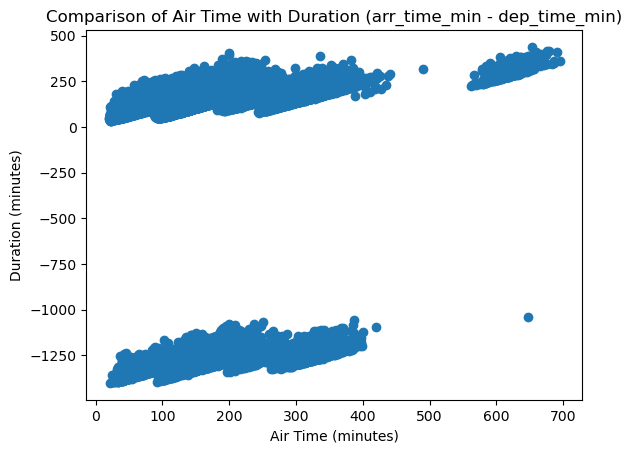

In [88]:
# Solution
import matplotlib.pyplot as plt

# Calculate the difference between arr_time_min and dep_time_min
data['duration'] = data['arr_time_min'] - data['dep_time_min']

# Create a scatter plot
plt.scatter(data['air_time'], data['duration'])
plt.title('Comparison of Air Time with Duration (arr_time_min - dep_time_min)')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Duration (minutes)')
plt.grid(False)
plt.show()

11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

In [89]:
# Solution
# It could derive that it could exist missing values while we calculate the duration. 
# Also, the following could also happen: if the calculated duration is negative, it might be due to a situation where the arrival time is on the next day and has a smaller value than the departure time. 
# In such cases, we can add 1440 minutes (24 hours) to the duration to get the correct positive value

12. Implement your fix to the major probelm. Remake the plot from the previous question.

In [18]:
# Solution
# Missing values
print("Missing Values:")
print(data[['air_time', 'arr_time_min', 'dep_time_min']].isnull().sum())

# Check data types
print("\nData Types:")
print(data[['air_time', 'arr_time_min', 'dep_time_min']].dtypes)

# Summary statistics
print("\nSummary Statistics:")
print(data[['air_time', 'arr_time_min', 'dep_time_min']].describe())



Missing Values:


KeyError: "['arr_time_min', 'dep_time_min'] not in index"

/var/folders/9d/2r5xh7sn3vs5d7bq30nnmk2r0000gn/T/ipykernel_5984/3012793483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'] = np.where(data['duration'] < 0, data['duration'] + 1440, data['duration'])


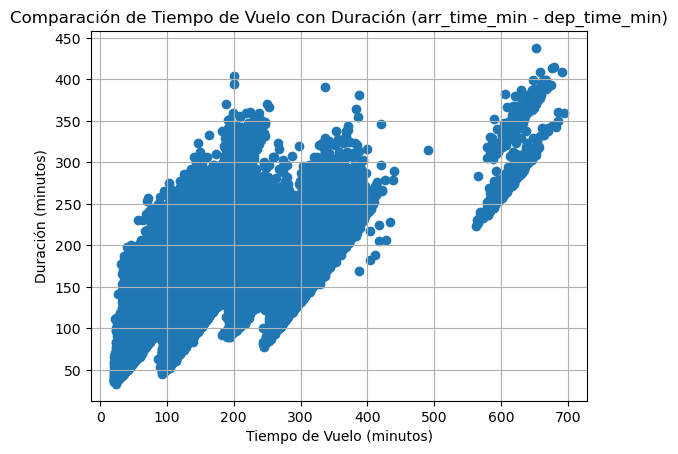

In [61]:
# Correct major problem
# Adjust negative durations by adding 1440 minutes (24 hours)
data['duration'] = np.where(data['duration'] < 0, data['duration'] + 1440, data['duration'])

# Eliminar filas con valores NaN en 'air_time' o 'duration'
data = data.dropna(subset=['air_time', 'duration'])

# Crear un gráfico de dispersión
plt.scatter(data['air_time'], data['duration'])
plt.title('Comparación de Tiempo de Vuelo con Duración (arr_time_min - dep_time_min)')
plt.xlabel('Tiempo de Vuelo (minutos)')
plt.ylabel('Duración (minutos)')
plt.grid(True)
plt.show()

13. Find the 10 most delayed flights 

In [56]:
# Solution
# Sort the DataFrame based on 'dep_delay' in descending order
delayed_flights = data.sort_values(by='dep_delay', ascending=False)

# Select the top 10 most delayed flights
top_10_delayed_flights = delayed_flights.head(10)

# Display the result
print("The 10 most delayed flights:")
print(top_10_delayed_flights)

the 10 most delayed flights:
        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
7072          7073  2013      1    9     641.0             900     1301.0   
235778      235779  2013      6   15    1432.0            1935     1137.0   
8239          8240  2013      1   10    1121.0            1635     1126.0   
327043      327044  2013      9   20    1139.0            1845     1014.0   
270376      270377  2013      7   22     845.0            1600     1005.0   
173992      173993  2013      4   10    1100.0            1900      960.0   
151974      151975  2013      3   17    2321.0             810      911.0   
247040      247041  2013      6   27     959.0            1900      899.0   
270987      270988  2013      7   22    2257.0             759      898.0   
87238        87239  2013     12    5     756.0            1700      896.0   

        arr_time  sched_arr_time  arr_delay  ... origin  dest air_time  \
7072      1242.0            1530     1272.0  ... 

## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [7]:
# Solution
# Crea una serie booleana que indica para cada fila si el valor en la columna 'origin' está en el conjunto ['JFK', 'LGA', 'EWR'].
# Luego, utiliza la serie booleana para seleccionar las filas del DataFrame data donde la condición es verdadera
flights_nyc = data[data['origin'].isin(['JFK', 'LGA', 'EWR'])]

# Calcular el retraso promedio por destino
average_delays = flights_nyc.groupby('dest')['dep_delay'].mean()

# Ordenar los destinos por el retraso promedio de peor a mejor
average_delays_sorted = average_delays.sort_values(ascending=False)

# Asignar rangos a los destinos (1 para el peor destino)
destination_ranks = average_delays_sorted.rank(method='dense', ascending=False)

# Crear un DataFrame para mostrar los resultados
result = pd.DataFrame({
    'Average Delay': average_delays_sorted,
    'Rank': destination_ranks
})

# Mostrar el resultado
print(result)


      Average Delay   Rank
dest                      
CAE       35.570093    1.0
TUL       34.906355    2.0
OKC       30.568807    3.0
BHM       29.694853    4.0
TYS       28.493955    5.0
...             ...    ...
STT        4.613900  101.0
EYW        3.647059  102.0
PSP       -2.944444  103.0
LEX       -9.000000  104.0
LGA             NaN    NaN

[105 rows x 2 columns]


15. Which plane (`tailnum`) has the most minutes of delays total?

In [8]:
# Solution
# Sumar los retrasos por avión (tailnum)
total_delays = data.groupby('tailnum')['dep_delay'].sum()

# Encontrar el avión con el mayor retraso total
most_delayed_plane = total_delays.idxmax()
most_delayed_delay = total_delays.max()

# Mostrar el resultado
print(f"El avión con el mayor retraso total es {most_delayed_plane} con {most_delayed_delay} minutos de retraso.")


El avión con el mayor retraso total es N15910 con 7758.0 minutos de retraso.


16. Which airlines only offer flights from New York to one other airport?

In [10]:
# Solution
# Filtrar vuelos que salen de Nueva York
flights_nyc = data[data['origin'].isin(['JFK', 'LGA', 'EWR'])]

# por aerolínea y contar destinos únicos
destinations_per_carrier = flights_nyc.groupby('carrier')['dest'].nunique()

# Encontrar aerolíneas con solo un destino
single_destination_airlines = destinations_per_carrier[destinations_per_carrier == 1]

# Mostrar el resultado
print(single_destination_airlines)


carrier
AS    1
F9    1
HA    1
Name: dest, dtype: int64


17. Calculate the median arrival delay by airline.

In [12]:
# Solution
# Agrupar por aerolínea y calcular la mediana del retraso de llegada
median_arrival_delay_by_airline = data.groupby('carrier')['arr_delay'].median()

# Mostrar el resultado
print("The median arrival delay by airline:")
print(median_arrival_delay_by_airline)


The median arrival delay by airline:
carrier
9E    -7.0
AA    -9.0
AS   -17.0
B6    -3.0
DL    -8.0
EV    -1.0
F9     6.0
FL     5.0
HA   -13.0
MQ    -1.0
OO    -7.0
UA    -6.0
US    -6.0
VX    -9.0
WN    -3.0
YV    -2.0
Name: arr_delay, dtype: float64


18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


La mediana del retraso de llegada es un indicador de la puntualidad de una aerolinea, pero no es el unico factor que deberia ser considerado para evaluar la fiabilidad de una aerolinea; debido a que la mediana no refleja la calidad general del servicio, pues una arolinea podria tener una mediana de retraso menor por los horarios de vuelo mas conservadores, asimismo, por el tamaño y alcance de la aerolinea, pues las mas grandes con mas variedad de rutas podrian enfrentar diferentes desafios a comparacion con aerolineas mas pequeñas.

19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

Las características típicas de los retrasos en un grupo de vuelos sugieren que existen cuatro maneras adicionales para evaluar los retrasos de vuelos. Una de ellas es el promedio de retrasos, el cual indica la tendencia general de retraso, pero puede ser sensible a valores atípicos extremos. Por otra parte, la desviación estándar y la varianza de los retrasos son importantes, ya que estas medidas de dispersión indican cuán consistentes son los retrasos en una aerolínea. Una desviación estándar baja sugiere que la mayoría de los vuelos tienen retrasos similares, ya sean cortos o largos, mientras que una desviación estándar alta indica una mayor variabilidad en los retrasos. Además, es relevante considerar tanto el porcentaje de vuelos retrasados como el análisis del rango intercuartil de los retrasos.



20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [13]:

# Solution

# Umbral para considerar un vuelo como retrasado (por ejemplo, 15 minutos)
retraso_umbral = 15

# Función para calcular el porcentaje de vuelos retrasados
def porcentaje_retrasos(group):
    return (group > retraso_umbral).mean() * 100

# Calcular las métricas por aerolínea
metricas_por_aerolinea = data.groupby('carrier')['arr_delay'].agg([
    pd.NamedAgg(column='Media', aggfunc='mean'),
    pd.NamedAgg(column='Desviación Estándar', aggfunc='std'),
    pd.NamedAgg(column='Porcentaje Retrasados', aggfunc=porcentaje_retrasos),
    pd.NamedAgg(column='IQR', aggfunc=lambda x: x.quantile(0.75) - x.quantile(0.25))
])

print(metricas_por_aerolinea)

# Identificar si hay aerolíneas que se desempeñan mal en múltiples métricas
print("\nAerolíneas con desempeño pobre en múltiples métricas:")
print(metricas_por_aerolinea[metricas_por_aerolinea > metricas_por_aerolinea.quantile(0.75)].dropna(thresh=2))

             Media  Desviación Estándar  Porcentaje Retrasados    IQR
carrier                                                              
9E        7.379669            50.086778              23.342362  36.00
AA        0.364291            42.516182              18.344587  29.00
AS       -9.930889            36.482633              14.285714  34.00
B6        9.457973            42.842297              25.827766  31.00
DL        1.644341            44.402289              18.062773  28.00
EV       15.796431            49.861469              29.586694  40.00
F9       21.920705            61.645997              37.080292  40.00
FL       20.115906            54.087671              32.668712  31.00
HA       -6.915205            75.129420              12.573099  30.50
MQ       10.774733            43.174306              25.673372  31.00
OO       11.931034            48.584926              21.875000  22.00
UA        3.558011            40.984344              21.464246  30.00
US        2.129595  